# Classification of the MNIST dataset using Scikit-Learn and Python

In this notebook i will be looking at the MNIST dataset, which is a collection of 70,000 small images of handwritten numbers. This was created by the US census bureau. Each letter is held in a dataset and is labelled with the correct letter / digit.  <br><br>Scikit-Learn provides helper functions that pre-load this dataset into the package for development purposes. Firstly there is some boiler plate stuff that we need set to allow things to work smoothly in the notebook.  <br>Common Packages<br>Set Matplot Lib settings to apply to all figures.<br>Where to save the images we might create.

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# MNIST Dataset

So  the MNIST dataset is pre-loaded into SciKit-Learn. We can reference it with the following code.

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': u'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

So the dataset has the following<br>
<ul>
  <li>70,000 seperate examples</li>
  <li>Each these images has 28X28 pixiels = 784</li>
  <li>Each of these is held in a array of numbers that shows the instensity of the colour - each between 0 (black) - 255 (white)</li>
</ul>

If we want to see one of these images we can view it using Matplot Libs IMSHOW() function. We we also need to reshape the array so it makes a 28X28 image again. We can do this by using the reshape function.

We need to name these arrays - the MNIST dataset comes in two parts - a data part and a target part. Basically a train-test split. We can unpack this is two variables - X and Y

In [10]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000,)

So have we are going to call some these the MSINT images so we can display them. Lets call 5 versions of the number 4.

This is a feature chosen at random:  6.0 @ random position in dataset: 37920


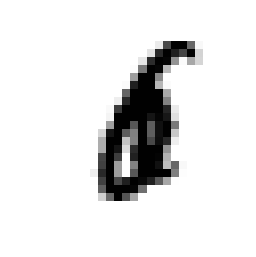

This is a feature chosen at random:  1.0 @ random position in dataset: 11322


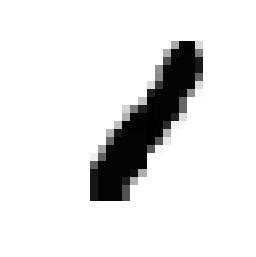

This is a feature chosen at random:  1.0 @ random position in dataset: 6268


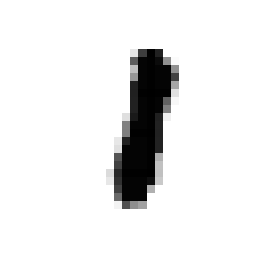

This is a feature chosen at random:  0.0 @ random position in dataset: 2657


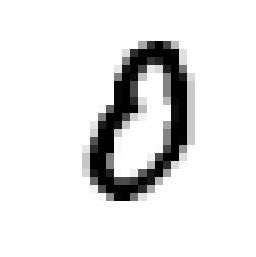

In [38]:
from random import randint
start_point = 1
invalid = True
while start_point <> 5:
    random_point = randint(1000, 70000)
    print('This is a feature chosen at random: ' , y[random_point] , '@ random position in dataset:' , random_point)
    some_digit = X[random_point]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()
    start_point = start_point + 1

For testing purposes we can't have all of these numbers in numeric order - otherwise it might afferct the result of the testing we want to produce. So we need to use the <b>Numpy Shuffle</b> feature to random and reset the indexes of this dataset. 

In [41]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [42]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

So let us chck the shuffle excersise worked by looking at one of the exmpales we displayed previously. Lets focus on the zero we saw at position 2657 - and we can see it is now a 2.

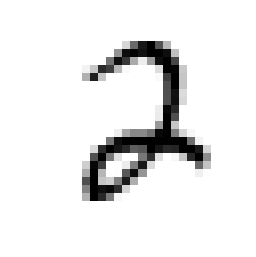

In [44]:
    some_digit = X_train[2657]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()

# Creating a Binary classifier - to detect the number 4 in the data set

Lets call this the Four finder - baiscally what this is going to do is give a binary prediction of wether it thinks the number it is currently looking at is a 4 (true) or not a 4 (false).<br><br>So we need to create a training set of digits we know are fours so it can then be applied to the test data set. We do this be creating two data sets - for training and testing. 

In [45]:
y_train_4 = (y_train ==4) ## True for all the fours in the dataset.....
y_test_4 = (y_test ==4)

So now we are going to choose a classifier from Scikit-Learn to examine the data set and make a prediction. For this I am going to choose - <b>SGD (Stochastic Gradient Descent)</b> Classifier. This classifier has a good record of working through large datasets efficiently.<br><br>So we will create a SGDClassifier and train it on the whole training data set from MNIST.We will also use the <b>fit()</b> command to fit the data to the model. The <b>random state</b> parameter makes it have the same result each time you run it. 

In [49]:
from sklearn.linear_model import SGDClassifier

SDG_Class = SGDClassifier(random_state=101)
SDG_Class.fit(X_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=101, shuffle=True,
       verbose=0, warm_start=False)

Now you can use to detect the images of the number 4. You need to pass the number you wish to check into the model and it will be a prediction if the number is indeed a 4 or not by returning a True or False on the inputted image.

In [75]:
SDG_Class.predict(X_test[5020])

C:\Users\Glandore\AppData\Local\Enthought\Canopy32\User\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

You can see in this example we submitted the image at position of 4525 in the testing data set. We got a positive result for this. So when we look at this image we should see something pretty close to a 4! 

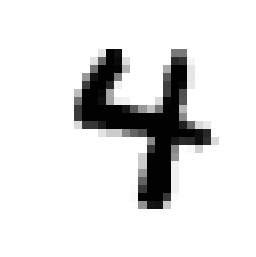

In [76]:
some_digit = X_test[5020]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

Looks pretty like a four to me! Just to test...it I will pass a position that False result for a Four in the testing set.

The model has predicted that this value does not look like a 4, a False was returned  [False]


C:\Users\Glandore\AppData\Local\Enthought\Canopy32\User\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


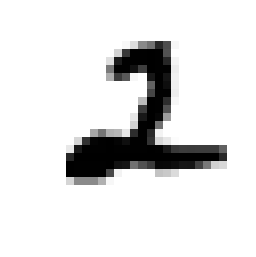

In [84]:
non_4 = 3023
print('The model has predicted that this value does not look like a 4, a False was returned ' , SDG_Class.predict(X_test[non_4]))
some_digit = X_test[non_4]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

# Measuring the Performance of the Model

For this part we are going to look at two methods of evaluating the performance of the models. <br>
<ul>
  <li><b>Cross Validation </b> aka Kfolds</li>
  <li><b>Confusion Matrix</b></li>
</ul>

<b>Cross Validation</b><br>With this measurement you are splitting the the training and testing sets into smaller parts and then testing the model against all of these parts. You can declare how many splits you want by setting the number of splits (cv=5 below).   

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(SDG_Class, X_train, y_train_4,cv=5, scoring="accuracy")

array([ 0.98066828,  0.97808516,  0.958     ,  0.96933078,  0.97458122])

Ok, so this result is giving us five accuracy scores which is basically saying that it is pretty good at predicting the accuracy. But it is always good practice to the utilize another model performance measure. This dataset is a bit skewed as we know that approx 10% of the numbers will be a four so it might be a bit biased.

<b>Confusion Matrix</b><br>A better way to asses the accuracy of a model is to use what is called a Confusion Matrix. This basically shows the numbers that the model got correct and how many it got wrong. One for each level - in this case if it was indeed a four and it was not a four. <br>First we need to create a new results set - we can use the cross_val_predict function to create a set of results to feed into the confusion matrix.

In [91]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(SDG_Class, X_train, y_train_4, cv=5)

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_4, y_train_pred)

array([[53568,   590],
       [ 1082,  4760]])

This result can be interperted in the following way.<br><br><font size="3" color="red">First row <b>[</font><b>counts of true negatives</b>(correct predictions), <b>false positives</b> (incorrect predictions)<font size="3" color="red">]<br>Second Row[</font><b>counts of false negatives</b> (incorrect non-four values and <b>true positives</b> (it was a four and the model got it correct)<font size="3" color="red">]</font> <br>

Thanks for reading...